In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import seaborn as sns
!pip install neattext
import neattext.functions as nfx
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.3 MB/s 
Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project-Phase1-CS4/emotions.csv")

In [ ]:
import io
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
df.head()

,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tweets = df['text']
labels = df['emotions']

In [ ]:
tweets[0]

'i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here'

In [ ]:
labels[0]

'sadness'

In [ ]:
tokenizer = Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
X_t, X_test, Y_t, Y_test = train_test_split( tweets,num_label, test_size = 0.10, random_state = 42)

NameError: ignored

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t,Y_t, test_size = 0.10, random_state = 42)

In [ ]:
# model = tf.keras.models.Sequential([
#       tf.keras.layers.Embedding(10000,16,input_length=maxlen),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
#         tf.keras.layers.Dense(1,activation='softmax')
# ])

# model.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )

In [ ]:
# history= model.fit(
#     X_train,Y_train,
#     validation_data=(X_val, Y_val),
#     epochs=2,
#     callbacks=[
#                tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)
#     ]      
# )

In [ ]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [ ]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file
    
    Args:
        filename (string): path to the CSV file
    
    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentence = row[1]
            sentence = remove_stopwords(sentence)
            sentences.append(sentence)

    return sentences, labels

In [ ]:
# GRADED FUNCTIONS: train_val_split
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets
    
    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set
    
    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """
    
    ### START CODE HERE
    
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    
    ### END CODE HERE
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(tweets, labels, TRAINING_SPLIT)

In [ ]:
# GRADED FUNCTION: fit_tokenizer
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences
    
    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token
    
    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """
    
    ### START CODE HERE
    
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer =Tokenizer(num_words = num_words, oov_token=oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)
    
    ### END CODE HERE
    
    return tokenizer

In [ ]:
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

In [ ]:
# GRADED FUNCTION: seq_and_pad
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length
    
    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence
    
    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """    
    ### START CODE HERE
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)

    
    ### END CODE HERE
    
    return padded_sequences

In [ ]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

In [ ]:
# GRADED FUNCTION: tokenize_labels
def tokenize_labels(all_labels, split_labels):
    """
    Tokenizes the labels
    
    Args:
        all_labels (list of string): labels to generate the word-index from
        split_labels (list of string): labels to tokenize
    
    Returns:
        label_seq_np (array of int): tokenized labels
    """
    ### START CODE HERE
    
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer =Tokenizer()
    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels) 
    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    
    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq)-1
    
    ### END CODE HERE
    
    return label_seq_np

In [ ]:
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

In [ ]:
#joy:0,sadness:1,anger:2, fear:3, love:4,surprise:5

In [ ]:
train_labels[17]

'fear'

In [ ]:
train_label_seq[17]

array([3])

In [ ]:
# GRADED FUNCTION: create_model
def create_model(num_words, embedding_dim, maxlen):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    
    tf.random.set_seed(123)
    
    ### START CODE HERE
    
    model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    ### END CODE HERE

    return model


In [ ]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
10421/10421 [==============================] - 20s 2ms/step - loss: 1.1227 - accuracy: 0.5492 - val_loss: 0.6920 - val_accuracy: 0.7856
Epoch 2/30
10421/10421 [==============================] - 19s 2ms/step - loss: 0.4980 - accuracy: 0.8311 - val_loss: 0.4215 - val_accuracy: 0.8491
Epoch 3/30
10421/10421 [==============================] - 18s 2ms/step - loss: 0.4075 - accuracy: 0.8511 - val_loss: 0.3985 - val_accuracy: 0.8508
Epoch 4/30
10421/10421 [==============================] - 18s 2ms/step - loss: 0.3891 - accuracy: 0.8538 - val_loss: 0.3870 - val_accuracy: 0.8519
Epoch 5/30
10421/10421 [==============================] - 19s 2ms/step - loss: 0.3732 - accuracy: 0.8558 - val_loss: 0.3691 - val_accuracy: 0.8562
Epoch 6/30
10421/10421 [==============================] - 18s 2ms/step - loss: 0.3581 - accuracy: 0.8574 - val_loss: 0.3617 - val_accuracy: 0.8548
Epoch 7/30
10421/10421 [==============================] - 19s 2ms/step - loss: 0.3471 - accuracy: 0.8587 - val_loss: 0

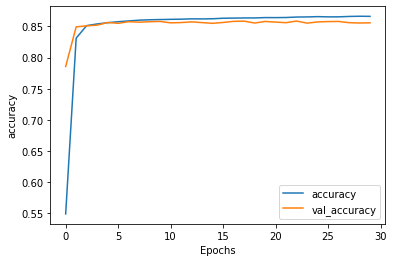

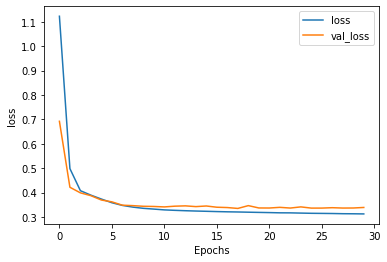

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model1 = tf.keras.models.load_model('/content/drive/MyDrive/Project-Phase1-CS4/tweet_emotion_model_g.h5')

In [ ]:
x = ["the view of skeleton under the lake terrified me to the bones but i was thrilled to see more"]

In [ ]:
x_padded_seq = seq_and_pad(x, tokenizer, PADDING, MAXLEN)

In [ ]:
x_padded_seq

array([[  6,   1,  10,   1, 633,   6,   1, 517,  19,   5,   6,   1,  20,
          2,  21, 671,   5, 112,  38,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [ ]:
y=np.argmax(model1.predict(x_padded_seq))

1/1 [==============================] - 0s 305ms/step


In [ ]:
y

3

In [ ]:
#joy:0,sadness:1,anger:2, fear:3, love:4,surprise:5

In [ ]:
# model.save("/content/drive/MyDrive/Project-Phase1-CS4/tweet_emotion_model_g.h5")